# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [76]:
from scipy import stats 
import numpy as np
import statistics 
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [77]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [121]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9]) 
# Printing the mean 
print('Mean is',GPU1.mean())

Mean is 10.333333333333334


In [79]:
## In testing whether GPU1 has an  average speed of 10.3 hrs, the null hypotheseis states that mean of GPU1,  
## 𝜇  equals 10.3. The alternative hypthesis states that the mean GPU1,  𝜇  is greater than 10.3.
## 𝐻0 :  𝜇  = 0
## 𝐻𝐴 :  𝜇  = 10.333333333333334

In [80]:
## Here we select  𝛼  = 0.05 and it is given that n, sample size = 15.
## We do not know the population standard deviation and the sample is not a large sample, n < 30. 
## So you use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic.

In [123]:
t_statistic, p_value = ttest_1samp(GPU1, 10.333333333333334)
print(t_statistic, p_value)

0.0 1.0


In [82]:
## In this example, p value is 1.0 it is greater than 5% level of significance

## So the statistical decision is to fail to reject the null hypothesis at 5% level of significance.

In [125]:
import numpy as np
import scipy.stats as stats
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
print("Sample Mean")
print(np.mean(GPU1))
mu=10.3
xbar = np.mean(GPU1)
s = np.std(GPU1,ddof= 1)
n=15
se = s/np.sqrt(n)
print("critical values")
print(stats.t.isf(0.025,df=n-1,loc=mu,scale=se))
print(stats.t.isf(0.975,df=n-1,loc=mu,scale=se))
print("P-Value")
print(2*stats.t.cdf(xbar,df=n-1,loc=mu,scale=se))
print("P-Value is greater than 5% hence fail to reject Null")



Sample Mean
10.333333333333334
critical values
10.950770454650034
9.649229545349968
P-Value
1.0859194423000986
P-Value is greater than 5% hence fail to reject Null


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [84]:
GPU1 = [11,9,10,11,10,12,9,11,12,9,11,12,9,10,9]
x = statistics.mean(GPU1) 
  
# Printing the mean 
print("Mean is :", x) 

GPU2 = [11,13,10,13,12,9,11,12,12,11,12,12,10,11,13]
y = statistics.mean(GPU2) 
  
# Printing the mean 
print("Mean is :", y) 

Mean is : 10.333333333333334
Mean is : 11.466666666666667


In [126]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print('P Value %1.5f' % p_value)  

P Value 0.01379


In [86]:
## In this example, p value is 0.01379 and it is less than 5% level of significance

## So the statistical decision is to reject the null hypothesis at 5% level of significance.

## So there is sufficient evidence to reject the null hypothesis that there is significant difference between data sets

## Question 3

He is trying a third GPU - GPU3.

In [87]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [102]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])
print('Count, Mean and standard deviation of spped of GPU1: %3d, %3.2f and %3.2f' % (len(GPU1), GPU1.mean(),np.std(GPU1,ddof =1)))
print('Count, Mean and standard deviation of spped of GPU2: %3d, %3.2f and %3.2f' % (len(GPU2), GPU2.mean(),np.std(GPU2,ddof =1)))
print('Count, Mean and standard deviation of spped of GPU3: %3d, %3.2f and %3.2f' % (len(GPU3), GPU3.mean(),np.std(GPU3,ddof =1)))

Count, Mean and standard deviation of spped of GPU1:  15, 10.33 and 1.18
Count, Mean and standard deviation of spped of GPU2:  15, 11.47 and 1.19
Count, Mean and standard deviation of spped of GPU3:  15, 11.07 and 1.49


In [104]:
GPU_df = pd.DataFrame()

df1            = pd.DataFrame({'GPU': '1', 'Speed':GPU1})
df2            = pd.DataFrame({'GPU': '2', 'Speed':GPU2})
df3            = pd.DataFrame({'GPU': '3', 'Speed':GPU3})
GPU_df = GPU_df.append(df1) 
GPU_df = GPU_df.append(df2) 
GPU_df = GPU_df.append(df3) 

In [105]:
GPU_df.head(10)

,GPU,Speed
0,1,11
1,1,9
2,1,10
3,1,11
4,1,10
5,1,12
6,1,9
7,1,11
8,1,12
9,1,9


C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


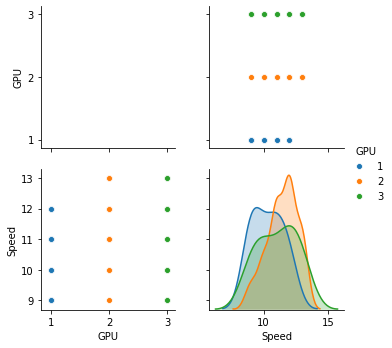

In [106]:
sns.pairplot(GPU_df,diag_kind='kde',hue='GPU')

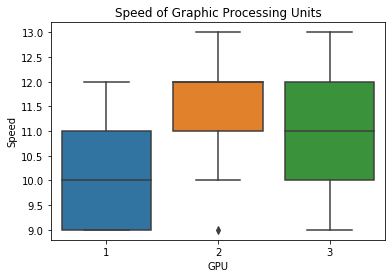

In [107]:
sns.boxplot(x = "GPU", y = "Speed", data = GPU_df)
plt.title('Speed of Graphic Processing Units')
plt.show()

In [108]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


In [109]:
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


In [110]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Speed ~ GPU', data = GPU_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df         F    PR(>F)
GPU        9.911111   2.0  2.973333  0.061988
Residual  70.000000  42.0       NaN       NaN


In [111]:
## calculated value of F ( = 2.97) is less than Critical value of F( = 3.15)
## So the statistical decision is to reject the null hypothesis at 5% level of significance.
## So there is sufficient evidence to reject the null hypothesis that at least one mean speed of a GPU is different from others
## There is significant difference between GPU1 and GPU3

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [112]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

In [ ]:
## Null hypothesis is that all input samples are from populations with equal variances.
## Alternate Hypothesis is that all input samples are from populations with unequal equal variances.

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [113]:
t_stats, p_value = stats.levene(e1,e2,e3)
print (t_stats, p_value)
print ("Since the pvalue > alpha, fail to reject null hypothesis as all input samples are from population with equal variances")

2.6741725711150446 0.12259792666001798
Since the pvalue > alpha, fail to reject null hypothesis as all input samples are from population with equal variances


In [ ]:
## hence accept the null hypothesis that all input samples are from populations with equal variances.

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [ ]:
## Null hypothesis all experiment results are similar
## altenate hypothesis is that all experiment results are not similar

In [114]:
e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])
print('Count, Mean and standard deviation of results of e1: %3d, %3.2f and %3.2f' % (len(e1), e1.mean(),np.std(e1,ddof =1)))
print('Count, Mean and standard deviation of results of e2: %3d, %3.2f and %3.2f' % (len(e2), e2.mean(),np.std(e2,ddof =1)))
print('Count, Mean and standard deviation of results of e3: %3d, %3.2f and %3.2f' % (len(e3), e3.mean(),np.std(e3,ddof =1)))

Count, Mean and standard deviation of results of e1:   4, 0.75 and 0.87
Count, Mean and standard deviation of results of e2:   4, 1.70 and 0.67
Count, Mean and standard deviation of results of e3:   4, 0.74 and 0.47


In [128]:
EXP_df = pd.DataFrame()

df1            = pd.DataFrame({'e': '1', 'res':e1})
df2            = pd.DataFrame({'e': '2', 'res':e2})
df3            = pd.DataFrame({'e': '3', 'res':e3})
EXP_df = EXP_df.append(df1) 
EXP_df = EXP_df.append(df2) 
EXP_df = EXP_df.append(df3) 

In [129]:
EXP_df.head()

,e,res
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


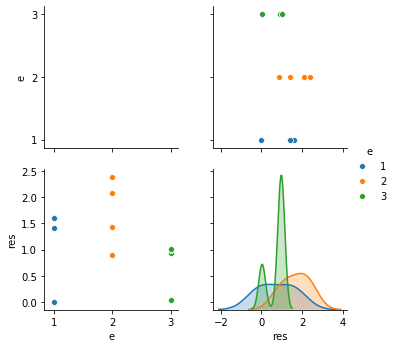

In [130]:
sns.pairplot(EXP_df,diag_kind='kde',hue='e')

In [131]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

F critical value for 2 and 60 df with .95 confidence 3.15
P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


In [132]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('res ~ e', data = EXP_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
e         2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


In [ ]:
## calculated value of F ( = 2.51) is less than Critical value of F( = 3.15)
## So the statistical decision is to reject the null hypothesis at 5% level of significance.
## There is significant difference in results between e1,e2 & e3

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I errors happen when we reject a true null hypothesis.Type I errors are equivalent to false positives.
Type II errors happen when we fail to reject a false null hypothesis.Type II errors are equivalent to false negatives.  

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


Null Hypothesis is that waiting time to place an order is 4.5 minutes.
Alternate Hypothesis is that the waiting time to place and order is not 4.5 minutes. 
## 𝐻0 :  𝜇  = 4.5 minutes
## 𝐻𝐴 :  𝜇  not equal to 4.5 minutes

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [140]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [141]:
import scipy.stats as stats
import scipy
from  scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [144]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 23.31567 P value 0.077664 Degrees of freedom 15


In [145]:
stats.chi2_contingency(dice)

(23.315671914716496,
 0.07766367301496693,
 15,
 array([[ 5.57419355,  8.20645161,  5.57419355,  4.64516129],
        [ 6.50322581,  9.57419355,  6.50322581,  5.41935484],
        [ 6.73548387,  9.91612903,  6.73548387,  5.61290323],
        [ 6.96774194, 10.25806452,  6.96774194,  5.80645161],
        [ 5.34193548,  7.86451613,  5.34193548,  4.4516129 ],
        [ 4.87741935,  7.18064516,  4.87741935,  4.06451613]]))

In [ ]:
## as p value is 0.07766367301496693 which is less that 5% we fail to reject the null hypothesis i.e accept null hypothesis 

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [148]:
stats.zscore(dice)

array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

In [151]:
p_values = stats.norm.sf(abs(stats.zscore(dice)))

In [152]:
p_values

array([[0.32171442, 0.42510621, 0.03309629, 0.07477068],
       [0.08245741, 0.26041025, 0.11033568, 0.5       ],
       [0.17726974, 0.23649578, 0.27014569, 0.07477068],
       [0.17726974, 0.05217856, 0.27014569, 0.16833418],
       [0.08245741, 0.48493574, 0.5       , 0.5       ],
       [0.32171442, 0.06074513, 0.27014569, 0.16833418]])

In [153]:
np.mean(p_values)

0.23428473233691496

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [155]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [168]:
t_statistic, p_value  =  stats.ttest_rel(after,before )
print('P Value %1.33f'% p_value)  

P Value 0.000000106820697946767596150943421
